In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [4]:
df = pd.read_csv('/Users/JohnnyBlaze/twitter_dataset/labeled_data.csv')

df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JohnnyBlaze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/JohnnyBlaze/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


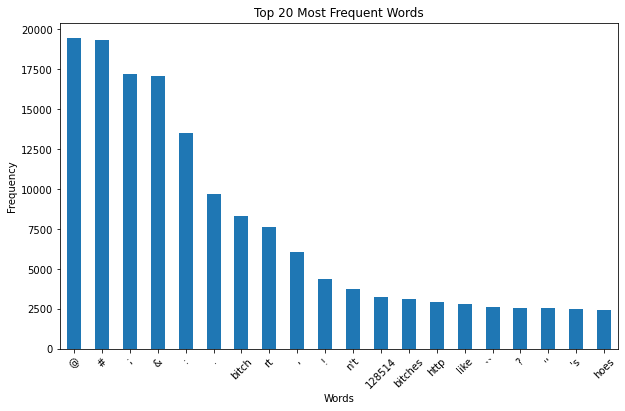

In [32]:
# Basic Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

df['clean_tweet'] = df['tweet'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stop_words]))

# Word Frequencies
word_frequencies = df['clean_tweet'].str.split(expand=True).stack().value_counts()

# Plot top 20
top_n = 20
top_words = word_frequencies.head(top_n)

plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

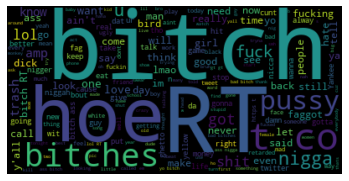

In [5]:
# Word Cloud

text = ' '.join(df['tweet'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

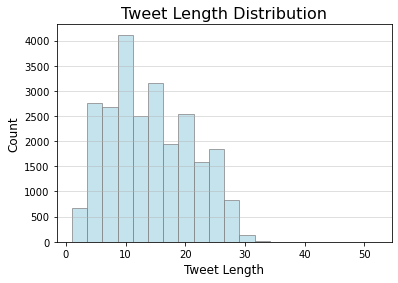

In [24]:
# Tweet Length

df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))
plt.hist(df['tweet_length'], bins=20, color='lightblue', edgecolor='gray', alpha=0.7)
plt.title('Tweet Length Distribution', fontsize=16)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.show()

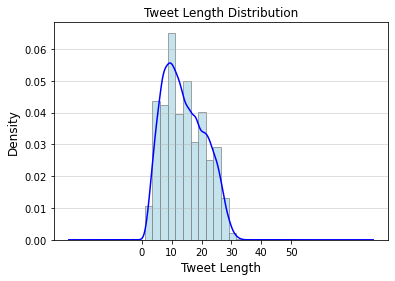

In [27]:
# Density Plot 

df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(6, 4))

# Histogram
ax.hist(df['tweet_length'], bins=20, density=True, color='lightblue', edgecolor='gray', alpha=0.7)

# KDE
df['tweet_length'].plot(kind='kde', color='blue')

ax.set_title('Tweet Length Distribution', fontsize=16)
ax.set_xlabel('Tweet Length', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.grid(axis='y', alpha=0.5)
ax.set_xticks(range(0, max(df['tweet_length'])+1, 10))
ax.set_xticklabels(range(0, max(df['tweet_length'])+1, 10), fontsize=10)

plt.title('Tweet Length Distribution')
plt.show()

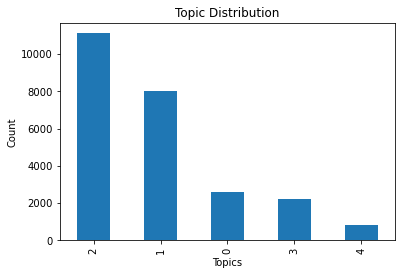

In [30]:
# Latent Dirichlet Allocation

vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(df['tweet'])

lda = LatentDirichletAllocation(n_components=5)
topic_matrix = lda.fit_transform(doc_term_matrix)

topic_counts = pd.DataFrame(topic_matrix).idxmax(axis=1).value_counts()
topic_counts.plot(kind='bar')
plt.title('Topic Distribution')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.show()